In [1]:
import glob
from stingray import Lightcurve
from astropy.io import fits
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [9,6]

In [2]:
lc_fnames = glob.glob('pps/P*PNX*SRCTSR*.FTZ')

lcs = []
for file in lc_fnames:
    hdul = fits.open(file)
    time = hdul[1].data.field('TIME')
    rate = hdul[1].data.field('RATE')
    err = hdul[1].data.field('ERROR')
    gtis = []
    for i in hdul[2].data:
        gtis.append([i[0],i[1]])
    lcs.append(Lightcurve(time, rate, err, gti=gtis, input_counts=False))
    

/home/rwebbe/.local/lib/python3.8/site-packages/stingray/lightcurve.py:520: UserWarning: There are non-finite points in the data, but they are outside GTIs. 
  warnings.warn("There are non-finite points in the data, but they are outside GTIs. ")


In [3]:
lc_fnames

['pps/P0934200701PNX000SRCTSR8003.FTZ']

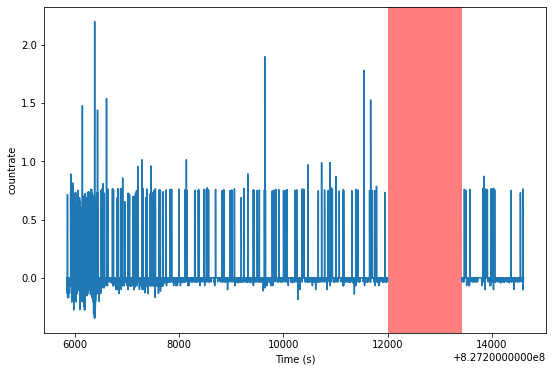

In [4]:
for i in range(len(lcs)):
    lcs[i].plot()

/home/rwebbe/.local/lib/python3.8/site-packages/stingray/lightcurve.py:408: RuntimeWarning: invalid value encountered in multiply
  counts_err = self._countrate_err * self.dt
/home/rwebbe/.local/lib/python3.8/site-packages/stingray/lightcurve.py:388: RuntimeWarning: invalid value encountered in multiply
  counts = self._countrate * self.dt


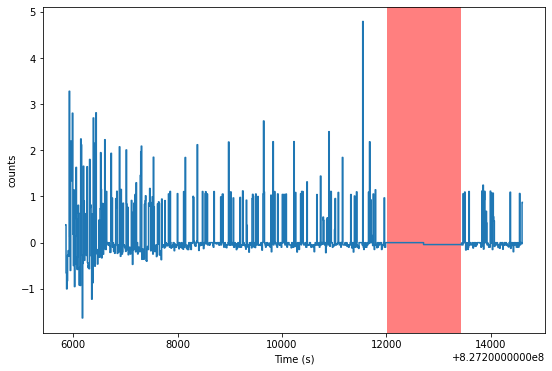

In [5]:
for i in range(len(lcs)):
    lcs[i].rebin(10).plot()

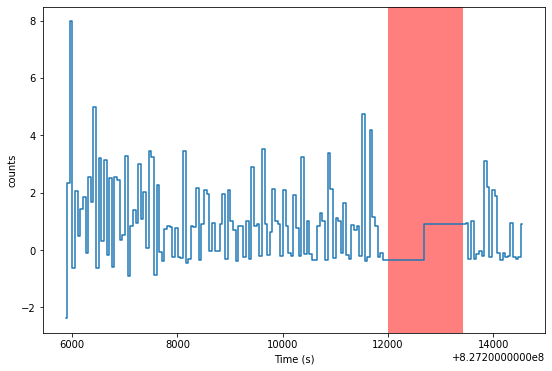

In [6]:
for i in range(len(lcs)):
    lcs[i].rebin(50).plot()

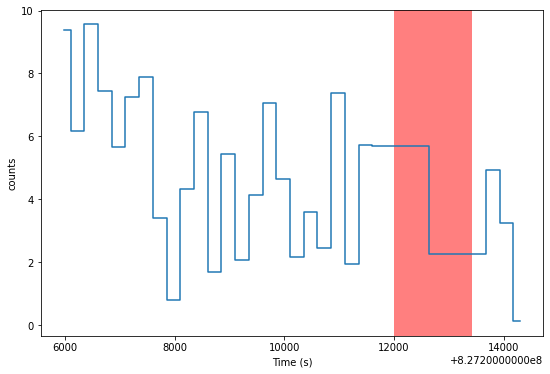

In [7]:
for i in range(len(lcs)):
    lcs[i].rebin(250).plot()

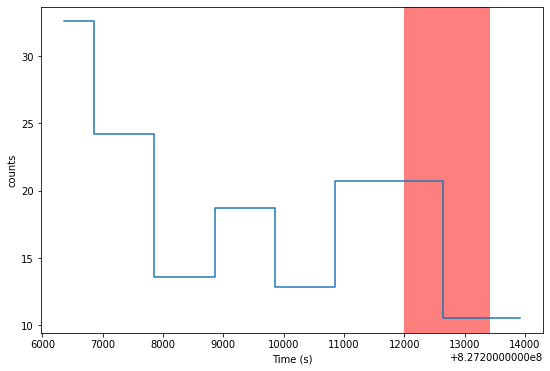

In [8]:
for i in range(len(lcs)):
    lcs[i].rebin(1000).plot()